In [17]:
# Bibliotecas usadas
import pandas as pd
import requests
import yfinance as yf
import statistics as st

# Biblioteca para análise gráfica
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

# Ignorar avisos
import warnings
warnings.filterwarnings('ignore')

In [18]:
# Criando o Data Frame
header = {'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko)\
Chrome/101.0.4951.67Safari/537.36"}

url = 'https://br.financas.yahoo.com/quote/MRFG3.SA/history?period1=1183075200&period2=1653091200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true'
request = requests.get(url, headers=header)

df = yf.download('MRFG3.SA')
# Apagando a coluna Fechamento ajustado
del df['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [19]:
# Transformando o DataFrame na base de dados para análise e apagando colunas que podem ser criadas mais de uma vez
if len(df.columns) > 7:
    df = df.drop("index", axis=1)

df = df.reset_index()
BaseDados = df

Text(0, 0.5, 'Valor da Ação (R$)')

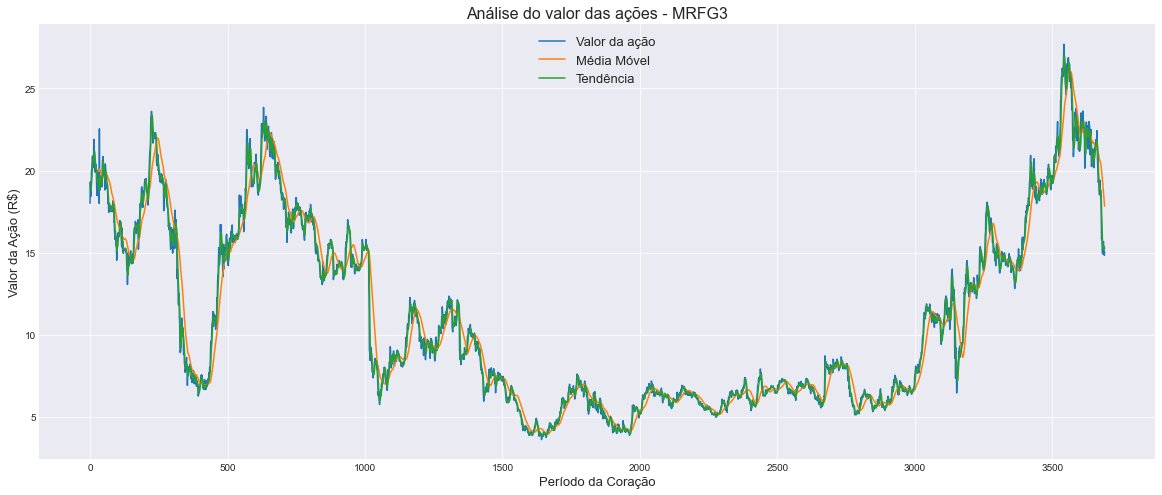

In [20]:
## Grafico de Tendência e Média móvel

# Criando as variáveis
MediaMovel = BaseDados['Close'].rolling(5).mean()
Tendencia = BaseDados['Close'].rolling(30).mean()

# Estilo do gráfico
plt.style.use('seaborn-darkgrid')
plt.figure( figsize=(20, 8) )
plt.title('Análise do valor das ações - MRFG3', fontsize=16)

# Criando o gráfico
plt.plot( BaseDados.Close, label="Valor da ação")
plt.plot( Tendencia, label="Média Móvel")
plt.plot( MediaMovel, label='Tendência')

# Titulos e legendas
plt.legend(fontsize=13, loc=9)
plt.xlabel('Período da Coração',fontsize=13)
plt.ylabel('Valor da Ação (R$)',fontsize=13)

Média Móvel: É utilizada para medir o comportamento médio do preço do ativo de um determinado periodo que no caso do gráfico é de 20 dias.

Tendência: Calcula qual a tendência da ação, se ela é tendência de alta ou baixa do preço.

Text(0, 0.5, 'Valor da Ação (R$)')

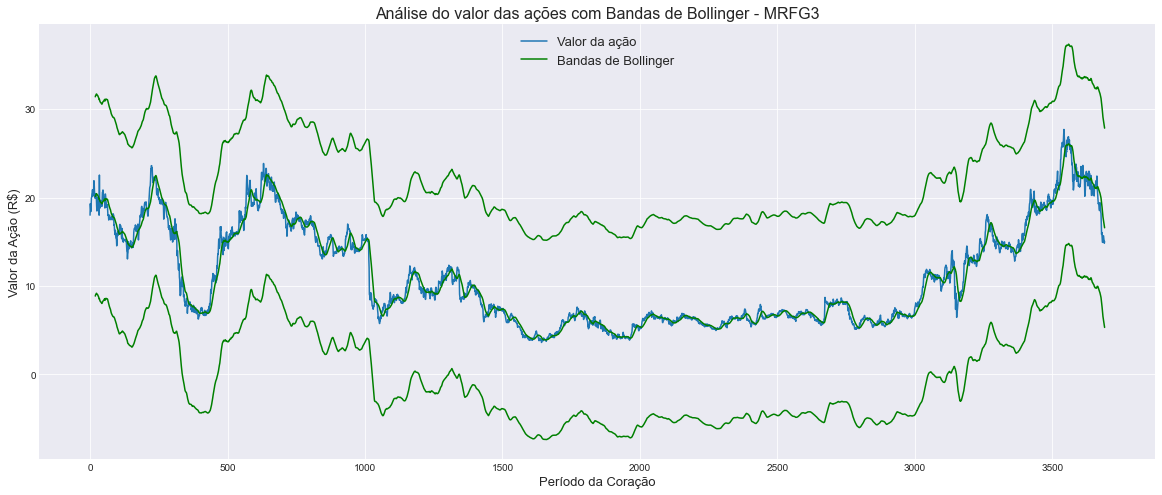

In [21]:
## Grafico de Tendência e Média móvel Bandas de Bollinger

# Criando as variáveis
BollingerSup = BaseDados['Close'].rolling(20).mean() + (2* st.stdev(BaseDados["Close"]))
Bollinger = BaseDados['Close'].rolling(20).mean()
BollingerInf = BaseDados['Close'].rolling(20).mean() - (2* st.stdev(BaseDados["Close"]))

# Estilo do gráfico
plt.style.use('seaborn-darkgrid')
plt.figure( figsize=(20, 8) )
plt.title('Análise do valor das ações com Bandas de Bollinger - MRFG3', fontsize=16)

# Criando o gráfico
plt.plot( BaseDados.Close, label="Valor da ação")
plt.plot( BollingerSup, color = "green")
plt.plot( Bollinger, label='Bandas de Bollinger', color = "green")
plt.plot( BollingerInf, color = "green")

# Titulos
plt.legend(fontsize=13, loc=9)
plt.xlabel('Período da Coração',fontsize=13)
plt.ylabel('Valor da Ação (R$)',fontsize=13)

Bandas de Bollinger: É um indicador de volatilidade para prever se um ativo está sobre-comprado, estável ou sobre-vendido.

As bandas tentam demarcar o possível limite do mercado, ou seja, quando o preço estiver dentro das bandas o ele pode ganhar ou perder força assim que atingem as extremidades.

Text(0, 0.5, 'Valor da Ação (R$)')

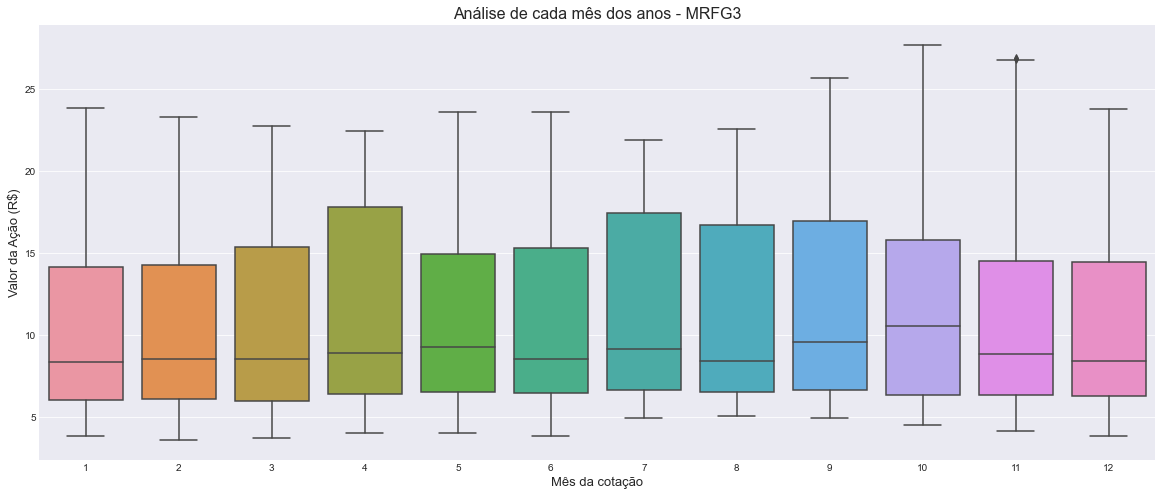

In [22]:
# Criando colunda de Mês
BaseDados["Month"] = BaseDados["Date"].dt.month

# Gerando BoxPlot
plt.figure(figsize= (20,8))
sns.boxplot(data=BaseDados,x= "Month", y = "Close")
plt.title('Análise de cada mês dos anos - MRFG3', fontsize=16)
plt.xlabel('Mês da cotação',fontsize=13)
plt.ylabel('Valor da Ação (R$)',fontsize=13)

In [23]:
# Criando gráfico com a Abertura, Fechamento, Maior e Menor valor do dia

Grafico = go.Figure(
    data=[
          go.Candlestick(
              x= BaseDados.Date,
              open = BaseDados['Open'],
              high = BaseDados['High'],
              low = BaseDados['Low'],
              close = BaseDados['Close'],
          )
    ]
)
Grafico.layout.template = "seaborn"
Grafico.layout.height = 600
Grafico.layout.width = 1180
Grafico.show()